## Import libraries ##

In [1]:
##  import libraries

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline

## Load the JSON files ##

In [2]:
##  load the json files to 

path_to_json = "F:/NeU 1st Sem/DS/DS Final Project/Dataset/"  
json_pattern = os.path.join(path_to_json, "*.json")
file_list = glob.glob(json_pattern)
temp =[]

for file in file_list:
    print(file)
    data = pd.read_json(file, lines=True)
    temp.append(data)
final = pd.concat(temp)

F:/NeU 1st Sem/DS/DS Final Project/Dataset\AMAZON_FASHION_5.json
F:/NeU 1st Sem/DS/DS Final Project/Dataset\Appliances_5.json
F:/NeU 1st Sem/DS/DS Final Project/Dataset\Prime_Pantry_5.json


In [3]:
##  check shape of the dataset

final.shape, type(final)

((143241, 12), pandas.core.frame.DataFrame)

In [4]:
## view first few records

final.head()

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote
0,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Five Stars,1441324800,True,NaN
1,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Five Stars,1441324800,True,NaN
2,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Five Stars,1441324800,True,NaN
3,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Five Stars,1441324800,True,NaN
4,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Five Stars,1441324800,True,NaN


In [5]:
## checking summary of the dataframe

final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143241 entries, 0 to 137787
Data columns (total 12 columns):
asin              143241 non-null object
image             1599 non-null object
overall           143241 non-null int64
reviewText        143048 non-null object
reviewTime        143241 non-null object
reviewerID        143241 non-null object
reviewerName      143225 non-null object
style             4297 non-null object
summary           143180 non-null object
unixReviewTime    143241 non-null int64
verified          143241 non-null bool
vote              11808 non-null object
dtypes: bool(1), int64(2), object(9)
memory usage: 13.3+ MB


In [6]:
##  checking the ratings column which will be our target for sentiment analysis

print("Unique Ratings: ",final.overall.unique())

rating = final.overall.value_counts().sort_index(ascending = False)
rating = rating.reset_index()
rating.columns = ["Rating", "Frequency"]
rating["Percentage"] = rating.Frequency / rating.Frequency.sum() * 100
rating

Unique Ratings:  [5 3 2 1 4]


,Rating,Frequency,Percentage
0,5,105226,73.460811
1,4,21001,14.661305
2,3,9867,6.888391
3,2,3767,2.629834
4,1,3380,2.359660


C:\Users\Win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


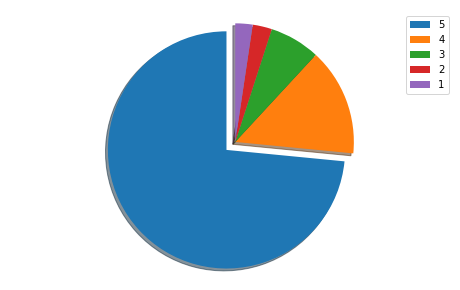

In [7]:
## Pie-chart representation of the different ratings

plt.figure(figsize=(8,5))
explode=[0.1,0,0,0,0]
x, y = plt.pie(rating["Percentage"], explode=explode,labels=rating.Rating,shadow=True, startangle=90,textprops={"color":"w", "fontsize":10})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(x, labels = rating.Rating, loc="best")

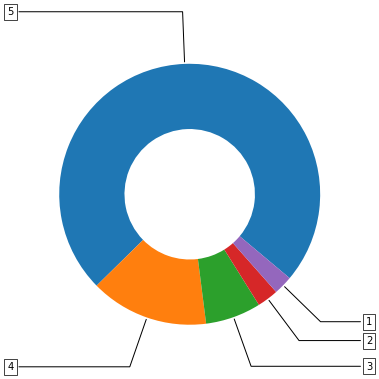

In [8]:
fig, ax = plt.subplots(figsize=(15, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(rating["Percentage"] , wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(rating.Rating[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

#ax.set_title("Ratings plot", c="w")

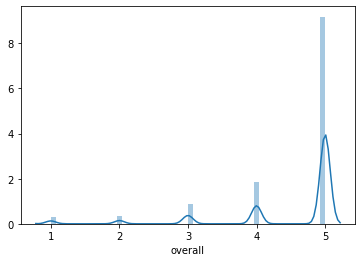

In [9]:
## frequency distribution of the 

sns.distplot(final.overall)

In [10]:
##  Add a new column sentiment

final.loc[final.overall >= 4, "Sentiment"] = 1
final.loc[final.overall <= 3, "Sentiment"] = 0

In [11]:
final.head()

,asin,image,overall,reviewText,reviewTime,reviewerID,reviewerName,style,summary,unixReviewTime,verified,vote,Sentiment
0,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Five Stars,1441324800,True,NaN,1.0
1,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Five Stars,1441324800,True,NaN,1.0
2,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Five Stars,1441324800,True,NaN,1.0
3,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Five Stars,1441324800,True,NaN,1.0
4,B000K2PJ4K,NaN,5,Great product and price!,"09 4, 2015",ALJ66O1Y6SLHA,Tonya B.,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Five Stars,1441324800,True,NaN,1.0


In [12]:
## Groupby and check count of the sentiments(binary)

senti = final.Sentiment.value_counts()
senti = senti.reset_index()
senti["%age"] = senti.Sentiment / senti.Sentiment.sum()
senti

,index,Sentiment,%age
0,1.0,126227,0.881221
1,0.0,17014,0.118779


In [13]:
##  use only review text and sentiment column for analysis

final_dataset = dataset = final[["reviewText", "Sentiment"]]
final_dataset.head()

,reviewText,Sentiment
0,Great product and price!,1.0
1,Great product and price!,1.0
2,Great product and price!,1.0
3,Great product and price!,1.0
4,Great product and price!,1.0


In [14]:
## check for null values

final_dataset.isnull().sum()

reviewText    193
Sentiment       0
dtype: int64

In [15]:
## check all the rows with null reviews

final_dataset[final_dataset.reviewText.isnull()][:10]

,reviewText,Sentiment
172,NaN,1.0
285,NaN,1.0
535,NaN,1.0
648,NaN,1.0
890,NaN,1.0
1003,NaN,1.0
1258,NaN,1.0
1371,NaN,1.0
1628,NaN,1.0
1740,NaN,1.0


In [16]:
## remove rows with null reviews 

final_dataset = final_dataset.drop(final_dataset.index[final_dataset.reviewText.isnull()])
final_dataset.isnull().sum()

reviewText    0
Sentiment     0
dtype: int64

In [17]:
##  check for duplicate reviews

final_dataset.duplicated().value_counts()

False    99849
True     43163
dtype: int64

In [18]:
##  view some of the duplicate records

final_dataset[final_dataset.duplicated()][:10].sort_values(by="reviewText")

,reviewText,Sentiment
21,Excellent insole with good support.,1.0
1,Great product and price!,1.0
2,Great product and price!,1.0
3,Great product and price!,1.0
4,Great product and price!,1.0
20,Pinnacle seems to have more cushioning so my h...,1.0
17,Relieved my Plantar Fascitis for 3 Days. Then ...,0.0
7,Stays vibrant after many washes,1.0
18,This is my 6th pair and they are the best thin...,0.0
19,We have used these inserts for years. They pr...,1.0


In [19]:
##  remove duplciate reviews and verify

final_dataset.drop_duplicates(inplace=True)

final_dataset.duplicated().value_counts()

C:\Users\Win10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    99849
dtype: int64

In [20]:
final_dataset.reset_index(drop=True, inplace=True)
final_dataset.head()

,reviewText,Sentiment
0,Great product and price!,1.0
1,Waaay too small. Will use for futur children!,0.0
2,Stays vibrant after many washes,1.0
3,My son really likes the pink. Ones which I was...,1.0
4,Waaay too small. Will use for future child.,0.0


In [21]:
final_dataset.Sentiment.value_counts()
senti = final_dataset.Sentiment.value_counts()
senti = senti.reset_index()
senti["%age"] = senti.Sentiment / senti.Sentiment.sum()
senti

,index,Sentiment,%age
0,1.0,85619,0.857485
1,0.0,14230,0.142515


In [22]:
final_dataset = final_dataset.drop(final_dataset.query('Sentiment == 1').sample(frac=.834, random_state = 5).index)
final_dataset = final_dataset.reset_index(drop=True)
final_dataset.Sentiment.value_counts()

0.0    14230
1.0    14213
Name: Sentiment, dtype: int64

In [23]:
print(final_dataset.shape)
final_dataset.head(10)

(28443, 2)


,reviewText,Sentiment
0,Great product and price!,1.0
1,Waaay too small. Will use for futur children!,0.0
2,Waaay too small. Will use for future child.,0.0
3,Relieved my Plantar Fascitis for 3 Days. Then ...,0.0
4,This is my 6th pair and they are the best thin...,0.0
5,Pinnacle seems to have more cushioning so my h...,1.0
6,Waaaay too BIG,0.0
7,Good product for the price. Used very day and...,1.0
8,Good fit even after washing in hot water to fo...,1.0
9,They fit great. But they fade bad,0.0


In [24]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize
output1=[]
for i,sentence in enumerate(final_dataset.reviewText):
    continue
   # output1.append(' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(sentence)]))
    #dataset.reviewText[i] = (" ".join([SnowballStemmer("english", ignore_stopwords=True).stem(i) for i in sentence.split()]))
    #final_dataset.reviewText[i] = (' '.join([WordNetLemmatizer().lemmatize(w) for w in word_tokenize(sentence)]))
    
final_dataset.shape

(28443, 2)

In [25]:
final_dataset.head()

,reviewText,Sentiment
0,Great product and price!,1.0
1,Waaay too small. Will use for futur children!,0.0
2,Waaay too small. Will use for future child.,0.0
3,Relieved my Plantar Fascitis for 3 Days. Then ...,0.0
4,This is my 6th pair and they are the best thin...,0.0


(-0.5, 399.5, 199.5, -0.5)

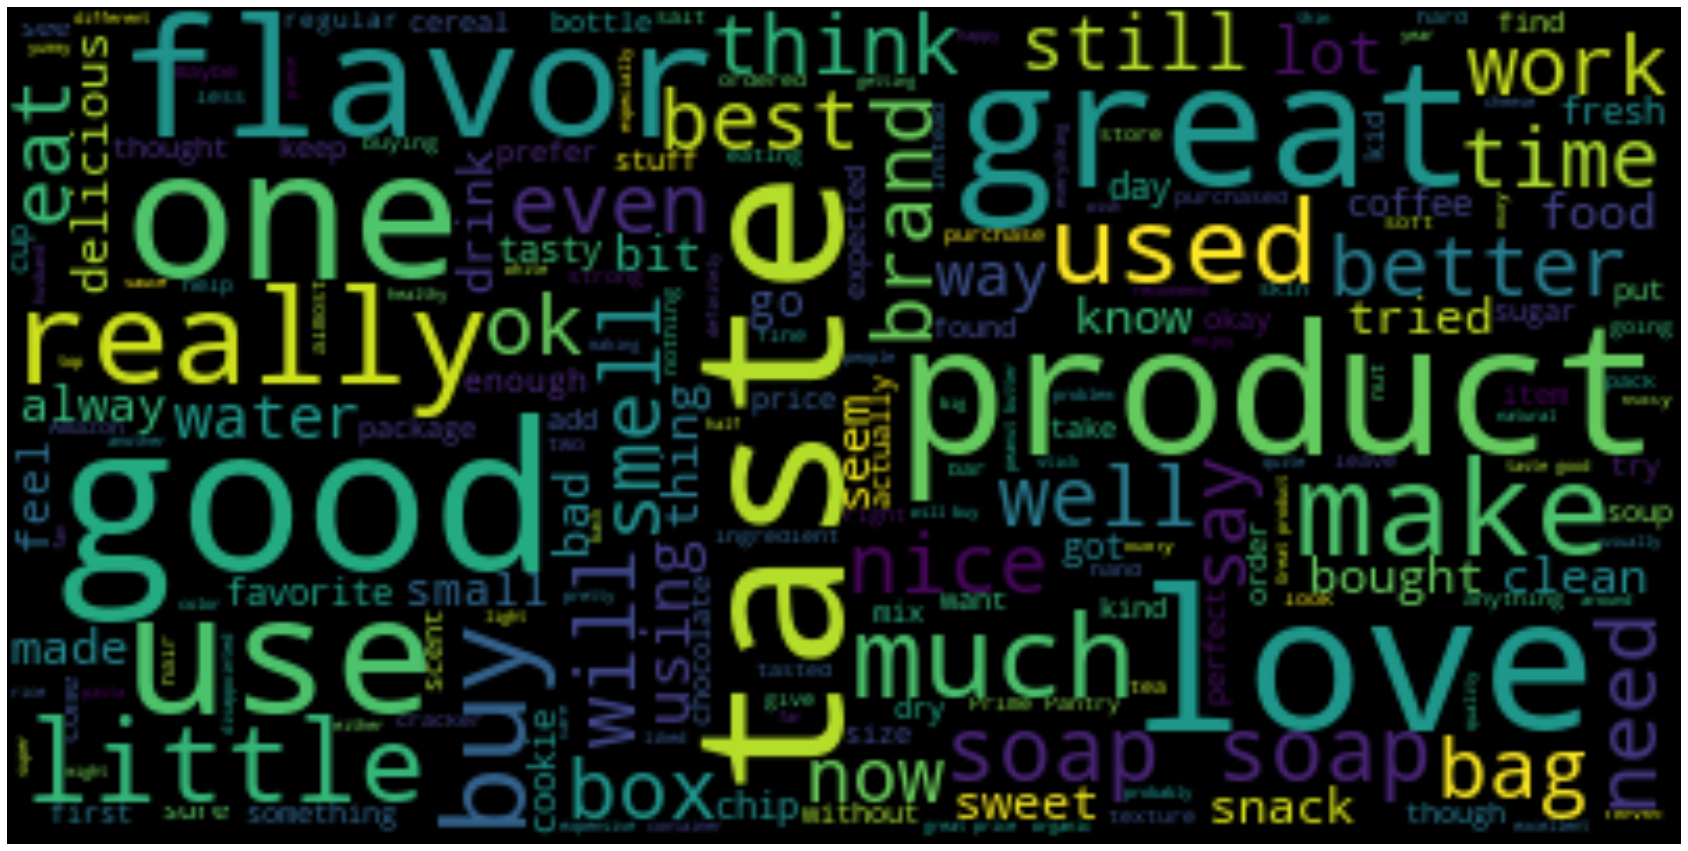

In [26]:
df_p = final_dataset[final_dataset['Sentiment'] == 1]
df_p = final_dataset.reset_index()
df_n = final_dataset[final_dataset['Sentiment'] == 0]
df_n = final_dataset.reset_index()

wordcloud = WordCloud(background_color="black", max_font_size=50).generate(' '.join(df_p['reviewText']))
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

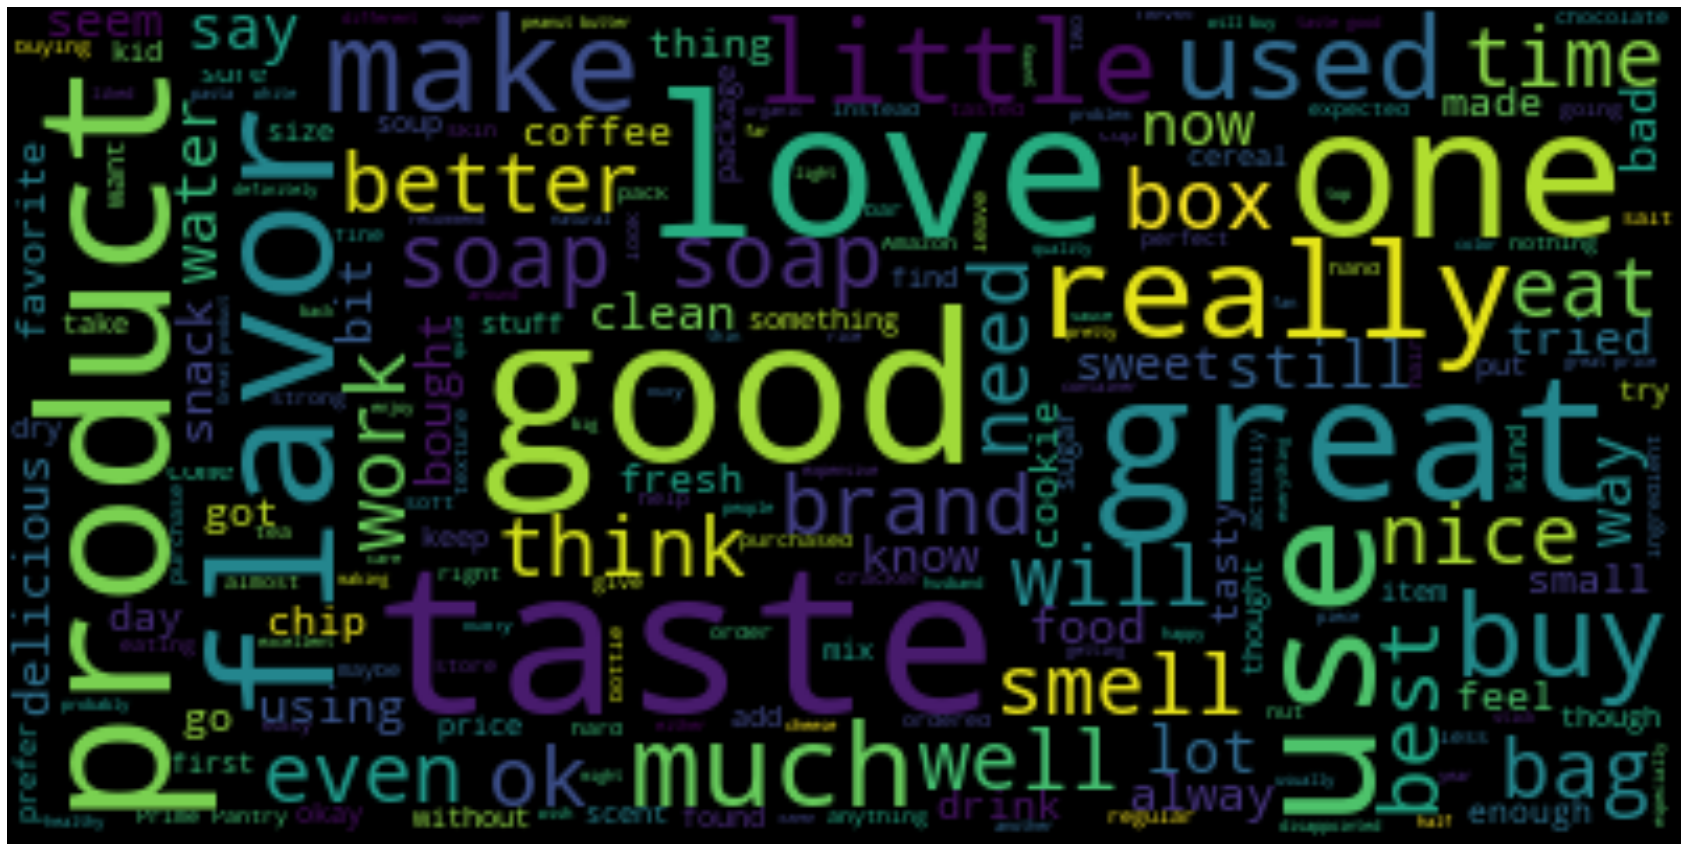

In [27]:
wordcloud = WordCloud(background_color="black", max_font_size=50).generate(' '.join(df_n['reviewText']))
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [28]:
##  define X and y
print(final_dataset.shape)
X = final_dataset.reviewText
y = final_dataset.Sentiment

X.shape, y.shape

(28443, 2)


((28443,), (28443,))

## tf-idf Vectorizer ##

In [29]:
##  initialize tfidf vectorizer

vect = TfidfVectorizer(strip_accents="ascii", lowercase="true", stop_words="english", use_idf=True)

In [30]:
tvec = vect.fit_transform(X)
tvec.shape

(28443, 17503)

In [31]:
#vect.get_feature_names()

weights = np.asarray(tvec.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
6958,good,0.038431
7103,great,0.030739
9004,like,0.028101
15469,taste,0.023876
9207,love,0.023049
6222,flavor,0.019064
8522,just,0.017529
12025,product,0.017059
11942,price,0.014408
12491,really,0.013150


In [32]:
##  split datainto test and training set

X_train, X_test, y_train, y_test = train_test_split(tvec, y, random_state=0, test_size=0.3)
print("Shape of X train:", X_train.shape)
print("Shape of y train:", y_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of y test:", y_test.shape)


Shape of X train: (19910, 17503)
Shape of y train: (19910,)
Shape of X test: (8533, 17503)
Shape of y test: (8533,)


In [33]:
## initialize and train KNN model

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#y_pred

In [34]:
print("Test set score:     {}".format(np.mean(y_pred == y_test)))


Test set score:     0.6198288995663893


In [35]:

'''
arr=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    arr.append(np.mean(y_pred == y_test))
    
plt.plot(np.arange(1,40),arr,c="r")
#plt.ylim(0.89,0.99)
'''

'\narr=[]\nfor i in range(1,40):\n    knn = KNeighborsClassifier(n_neighbors = i)\n    knn.fit(X_train, y_train)\n    knn.predict(X_test)\n    arr.append(np.mean(y_pred == y_test))\n    \nplt.plot(np.arange(1,40),arr,c="r")\n#plt.ylim(0.89,0.99)\n'

In [36]:
knn1 = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn1, params_knn, cv=10)
#fit model to training data
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
y_pred = knn_best.predict(X_test)

In [37]:
knn_best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [39]:
## initialize and train KNN model

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#y_pred

In [40]:
print("Test set score:     {}".format(np.mean(y_pred == y_test)))

Test set score:     0.6198288995663893


In [41]:
arr=[]
for i in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    arr.append(np.mean(y_pred == y_test))
    print("Test set score:     {}".format(np.mean(y_pred == y_test)))

Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893
Test set score:     0.6198288995663893


##  Random forest ##

In [42]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.760693777100668
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77      4336
         1.0       0.78      0.71      0.75      4197

    accuracy                           0.76      8533
   macro avg       0.76      0.76      0.76      8533
weighted avg       0.76      0.76      0.76      8533



In [44]:
feature_imp = pd.Series(clf.feature_importances_, index=vect.get_feature_names()).sort_values(ascending=False)
feature_imp[:10]

great        0.038564
love         0.024239
ok           0.015160
good         0.014568
taste        0.012099
didn         0.010181
like         0.009935
delicious    0.009373
best         0.009251
okay         0.007861
dtype: float64

In [45]:
#selecting only feature points which are > 0.007
feature_imp =  feature_imp[lambda x: x>0.007]
feature_imp

great        0.038564
love         0.024239
ok           0.015160
good         0.014568
taste        0.012099
didn         0.010181
like         0.009935
delicious    0.009373
best         0.009251
okay         0.007861
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

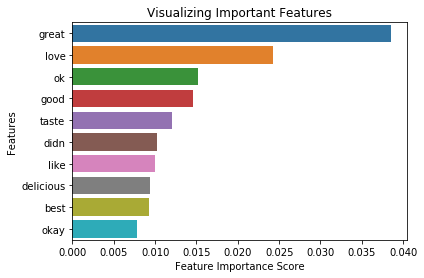

In [46]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [47]:
# Split dataset into features and labels
X1=tvec[:,pd.Series(feature_imp)]  
y1=final_dataset.Sentiment                                       
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.70, random_state=5) # 70% training and 30% test

In [48]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

# prediction on test set
y1_pred=clf.predict(X1_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y1_test, y1_pred))
#print("ROC:", roc_auc_score(y1_test,  nbm.predict_proba(X1_test)[:,1]))
print("Classification Report:")
print(classification_report(y1_test,y1_pred))

Accuracy: 0.4991210888453619
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      9942
         1.0       0.30      0.00      0.00      9969

    accuracy                           0.50     19911
   macro avg       0.40      0.50      0.33     19911
weighted avg       0.40      0.50      0.33     19911



In [49]:
improvemnet = RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                     max_depth=None,min_samples_split=2, 
                                     min_samples_leaf=100, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None,bootstrap=True,
                                     oob_score=True, n_jobs=-1, random_state=40,
                                     verbose=0, warm_start=False,class_weight=None)
improvemnet.fit(X_train, y_train)
y_pred= improvemnet.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.7196765498652291
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.60      0.69      4336
         1.0       0.67      0.84      0.75      4197

    accuracy                           0.72      8533
   macro avg       0.73      0.72      0.72      8533
weighted avg       0.74      0.72      0.72      8533



## Decision Tree ##

In [50]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.6268604242353217
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.93      0.72      4336
         1.0       0.81      0.32      0.45      4197

    accuracy                           0.63      8533
   macro avg       0.70      0.62      0.59      8533
weighted avg       0.69      0.63      0.59      8533



## Logistic Regression ##

In [51]:
std = StandardScaler(with_mean=False)
X1_train = std.fit_transform(X_train)
X1_test = std.transform(X_test)

In [52]:
start = time.time()

C_values = np.linspace(0.1,1,10)

cv_scores = []


for c in C_values:
    clf = LogisticRegression(C = c, class_weight = 'balanced')
    scores = cross_val_score(clf, X1_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_error = [1 - x for x in cv_scores]

optimal_C = C_values[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_C)

end = time.time()
print("Total time in minutes = ", (end-start)/60)

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


The optimal alpha is 0.1
Total time in minutes =  1.0254451394081117


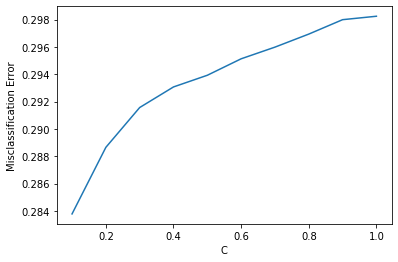

In [53]:
plt.plot(C_values, cv_error)
plt.xlabel('C')
plt.ylabel('Misclassification Error')
plt.show()

In [54]:
clf = LogisticRegression(C = optimal_C)
clf.fit(X1_train, y_train)
y_pred = clf.predict(X1_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 72.10828547990155


array([[3135, 1201],
       [1179, 3018]], dtype=int64)

In [55]:
idx = (-abs(clf.coef_)).argsort()[0,:10]
print("Top 50 features:")
for i in idx:
    print(vect.get_feature_names()[i])

Top 50 features:
love
awful
didn
great
did
spoiled
disappointing
okay
ok
stale
tasteless
hated
threw
strange
delicious
meh
perfect
unpleasant
best
soooo
missing
edible
issue
60
snap
brilliant
rip
description
addictive
mark
dinner
clams
nasty
loved
putting
suck
horrible
gloves
looks
shopping
lacks
honest
fan
excellent
church
bland
grew
terrific
wasn
called


## SVM Model ##

In [56]:
svc = SVC(kernel="linear", C=1, probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.8028829251142623

In [57]:
roc_auc_score(y_test,  svc.predict_proba(X_test)[:,1])

0.8778931170744874

Predicted   0.0   1.0   All
Actual                     
0.0        3454   882  4336
1.0         800  3397  4197
All        4254  4279  8533


Accuracy: 0.80
Precision: 0.79
Recall: 0.81
F1 Score: 0.80


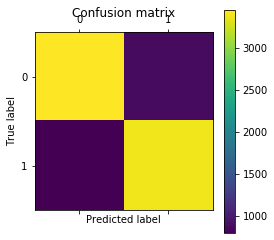

In [59]:
y_pred_svc = svc.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred_svc, rownames=['Actual'], colnames=['Predicted'], margins=True)
FP = df_confusion.loc[df_confusion.index == False, True].iloc[0]
TN = df_confusion.loc[df_confusion.index == False, False].iloc[0]
TP = df_confusion.loc[df_confusion.index == True, True].iloc[0]
FN = df_confusion.loc[df_confusion.index == True, False].iloc[0]

print(df_confusion)

print('\n')
KTTS_Accuracy = (TN+TP)/(FP+TN+TP+FN)
print('Accuracy: {:,.2f}'.format(KTTS_Accuracy))

KTTS_Precision = TP/(TP+FP)
print('Precision: {:,.2f}'.format(KTTS_Precision))

KTTS_Recall = TP/(TP+FN)
print('Recall: {:,.2f}'.format(KTTS_Recall))

KTTS_F1 = 2*(KTTS_Recall * KTTS_Precision) / (KTTS_Recall + KTTS_Precision)
print('F1 Score: {:,.2f}'.format(KTTS_F1))

cm = confusion_matrix(y_test, y_pred_svc)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#acc = cross_val_score(svc, tvec, y, cv=10, scoring='accuracy')
#pre = cross_val_score(svc, tvec, y, cv=10, scoring='precision')
#rec = cross_val_score(svc, tvec, y, cv=10, scoring='recall')

#print('Accuracy:', '\n', acc)
#print('Mean Accuracy: ', acc.mean(), 'Std Accuracy: ', acc.std(), '\n')
#print('Precision:', '\n', pre)
#print('Mean Precision: ', pre.mean(), 'Std Precision: ', pre.std(), '\n')
#print('Recall:', '\n', rec)
#print('Mean Recall: ', rec.mean(), 'Std Recall: ', rec.std(), '\n')


In [60]:
##  initialize Multinomial Naive Bayes model and train the model

nbm = MultinomialNB()
nbm.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
roc_auc_score(y_test,  nbm.predict_proba(X_test)[:,1])

0.8750326955556903

Predicted   0.0   1.0   All
Actual                     
0.0        3400   936  4336
1.0         810  3387  4197
All        4210  4323  8533


Accuracy: 0.80
Precision: 0.78
Recall: 0.81
F1 Score: 0.80


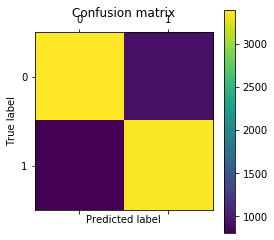

Accuracy: 
 [0.79367311 0.77961336 0.77504394 0.76758087 0.7862166  0.79957806
 0.78691983 0.80907173 0.79008439 0.79500703]
Mean Accuracy:  0.7882788913359979 Std Accuracy:  0.011499575011150632 

Precision: 
 [0.7877326  0.76803776 0.75128535 0.76098901 0.77484787 0.80811007
 0.78757939 0.81719653 0.79219858 0.80318379]
Mean Precision:  0.7851160950930779 Std Precision:  0.0201770560418985 

Recall: 
 [0.80379747 0.80098453 0.82208158 0.77973258 0.80647431 0.78536242
 0.78536242 0.79591837 0.78606615 0.78114004]
Mean Recall:  0.7946919870814615 Std Recall:  0.012918778196153467 



In [62]:
y_pred_nbm = nbm.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred_nbm, rownames=['Actual'], colnames=['Predicted'], margins=True)
FP = df_confusion.loc[df_confusion.index == False, True].iloc[0]
TN = df_confusion.loc[df_confusion.index == False, False].iloc[0]
TP = df_confusion.loc[df_confusion.index == True, True].iloc[0]
FN = df_confusion.loc[df_confusion.index == True, False].iloc[0]

print(df_confusion)

print('\n')
KTTS_Accuracy = (TN+TP)/(FP+TN+TP+FN)
print('Accuracy: {:,.2f}'.format(KTTS_Accuracy))

KTTS_Precision = TP/(TP+FP)
print('Precision: {:,.2f}'.format(KTTS_Precision))

KTTS_Recall = TP/(TP+FN)
print('Recall: {:,.2f}'.format(KTTS_Recall))

KTTS_F1 = 2*(KTTS_Recall * KTTS_Precision) / (KTTS_Recall + KTTS_Precision)
print('F1 Score: {:,.2f}'.format(KTTS_F1))

cm = confusion_matrix(y_test, y_pred_nbm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

acc = cross_val_score(nbm, tvec, y, cv=10, scoring='accuracy')
pre = cross_val_score(nbm, tvec, y, cv=10, scoring='precision')
rec = cross_val_score(nbm, tvec, y, cv=10, scoring='recall')

print('Accuracy:', '\n', acc)
print('Mean Accuracy: ', acc.mean(), 'Std Accuracy: ', acc.std(), '\n')
print('Precision:', '\n', pre)
print('Mean Precision: ', pre.mean(), 'Std Precision: ', pre.std(), '\n')
print('Recall:', '\n', rec)
print('Mean Recall: ', rec.mean(), 'Std Recall: ', rec.std(), '\n')


## Cross validation ##

In [63]:
## Negative review

test_string = np.array(["this product is damaged"])
tvec1 = vect.transform(test_string)
print(nbm.predict(tvec1))
print(nbm.predict_proba(tvec1))

[0.]
[[0.78720664 0.21279336]]


In [64]:
## Positive review

test_string = np.array(["this product is best and would recommend to others."])
tvec1 = vect.transform(test_string)
print(nbm.predict(tvec1))
print(nbm.predict_proba(tvec1))

[1.]
[[0.23698289 0.76301711]]
